## Abstraction

It's important for finance companies to know risk of giving credit to their clients. Credit scores are essential for companies to decide on whether giving credit to someone or not. In this project, we experiment on features of clients to decide on which ones are more important. SVM, logistic regression and desicion trees are utilized and compared. An interface that calculates credit score for given features is provided.

# Intoduction
&nbsp;&nbsp; Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

&nbsp;&nbsp; Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

# Data Dictionary
| Variable Name                        | Description                                                                                                                                              | Type       |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in years                                                                                                                                 | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |
### Train Data Loaded

## Related Work 

A two-stage hybrid credit scoring model using artificial neural networks and multivariate adaptive regression splines
http://www.sciencedirect.com/science/article/pii/S0957417404001782

Benchmarking state-of-the-art classification algorithms for credit scoring
https://link.springer.com/article/10.1057/palgrave.jors.2601545

Using neural network ensembles for bankruptcy prediction and credit scoring
http://www.sciencedirect.com/science/article/pii/S0957417407001558

A comparative assessment of ensemble learning for credit scoring
http://www.sciencedirect.com/science/article/pii/S095741741000552X

Comprehensible credit scoring models using rule extraction from support vector machines
http://www.sciencedirect.com/science/article/pii/S0377221706011878

Neural network credit scoring models
http://www.sciencedirect.com/science/article/pii/S0305054899001495

Statistical Classification Methods in Consumer Credit Scoring: a Review
http://onlinelibrary.wiley.com/doi/10.1111/j.1467-985X.1997.00078.x/full

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
data = pd.read_csv('cs-training.csv',sep=';').drop('Unnamed: 0', axis = 1).values
X = data[:,1:]
Y = data[:,0]

## Visualization

In this part we will show you the visualization of the data with respect to some aspects of them.


In [62]:
def plot_freq():
    ncount = len(X)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)    

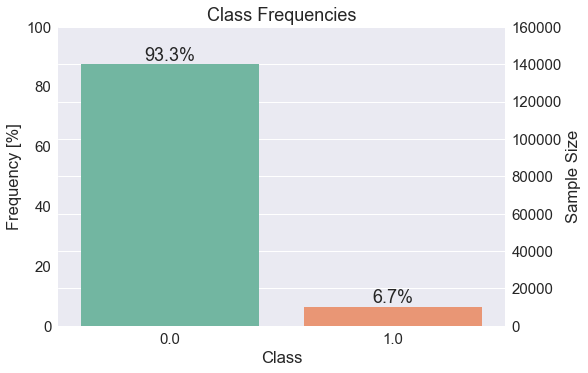

In [63]:
ax = sns.countplot(x = Y , palette="Set2")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Class')
ax.set_ylabel('Sample Size')
ax.set_ylim(top=160000)
plt.title('Class Frequencies')

plot_freq()

plt.show()

## Missing Values
 There are some values in the dataset that are missing or having really awkward magnitudes. Therefore, firstly, we should take care of them.

In [96]:

col_mean = np.nanmean(X,axis=0)

#Find indicies that you need to replace
inds = np.where(np.isnan(X))

#Place column means in the indices. Align the arrays using take
X[inds]=np.take(col_mean,inds[1])


## Linear Discriminant Analysis

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import minmax_scale

clf = LDA(solver='eigen', shrinkage='auto', priors=None, n_components=2,
                                    store_covariance=False, tol=0.0001)
X_lda = clf.fit(X, Y).transform(X)
print(X_lda.shape)
target_names = ['Yes','No']
colors = ['navy', 'turquoise']

plt.figure()

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_lda[Y == i, 0], X_lda[Y == i, 1], alpha=.8, color=color,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Loan Data')

plt.show()

(150000, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1